In [1]:
import sys,os

In [120]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hadoop/miniconda2/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['record']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
if 1:
    sys.path.insert(0,"../src/")
    os.environ['JAVA_HOME']='/usr/lib/jvm/java-openjdk/'

In [3]:
from pylshvec import *

In [4]:
set_lshvec_jar_path("/mnt/jfastseq-assembly-0.1.jar")

In [5]:
add_java_options("-Xmx32G")

In [6]:
model= LSHVec(model_file="/mnt/refdb_viruses_model_gs_k23_l3000_rand_m299", hash_file="/mnt/lsh_nt_NonEukaryota_k23_h25.crp")

In [7]:
dir(model)

['_LSHVec__arraylist_to_list',
 '_LSHVec__collection_to_arraylist',
 '_LSHVec__sub_seqs',
 '_LSHVec__to_java_stirng',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_java_options',
 'autoclass',
 'embedding',
 'embedding_single_thread',
 'getBatchsize',
 'getKmerSize',
 'getMaxItems',
 'getName',
 'getNumThread',
 'getRank',
 'getTaxIdPath',
 'getTaxNamePath',
 'getThreshold',
 'getVecDim',
 'hashTaxId',
 'isInitialized',
 'isOnlyShowLeaf',
 'isOnlyShowMainTax',
 'isWithoutUncult',
 'lshvec_jar_path',
 'model',
 'predict',
 'predict_single_thread',
 'set_lshvec_jar_path']

In [8]:
getIgnores = ['getRank', 'getName', 'getTaxIdPath', 'getTaxNamePath']
      
for u in dir(model):
    if not u in getIgnores:
        if u.startswith('get') or u.startswith('is'):
            fun = getattr(model, u)
            print(u, fun())

getBatchsize 1024
getKmerSize 23
getMaxItems 500
getNumThread 1
getThreshold 0.004999999888241291
getVecDim 100
isInitialized True
isOnlyShowLeaf False
isOnlyShowMainTax True
isWithoutUncult True


In [89]:
for u in getIgnores:
    fun = getattr(model, u)
    print(u, fun(1980526))

getRank species
getName Nairobi sheep disease orthonairovirus
getTaxIdPath [1, 10239, 4000001, 4011699, 4027768, 4027770, 4027773, 2559587, 4028110, 4028113, 4032822, 4032824, 4032826, 2497569, 4032829, 2497571, 2497576, 1980410, 4034803, 4035699, 4035703, 1980415, 4036275, 1980517, 4036277, 4036320, 4036323]
getTaxNamePath ['root', 'Viruses', 'dummy4000001', 'dummy4011699', 'dummy4027768', 'dummy4027770', 'dummy4027773', 'Riboviria', 'dummy4028110', 'dummy4028113', 'dummy4032822', 'dummy4032824', 'dummy4032826', 'Negarnaviricota', 'dummy4032829', 'Polyploviricotina', 'Ellioviricetes', 'Bunyavirales', 'dummy4034803', 'dummy4035699', 'dummy4035703', 'Nairoviridae', 'dummy4036275', 'Orthonairovirus', 'dummy4036277', 'dummy4036320', 'dummy4036323']


In [92]:
import numpy as np
import pandas as pd

def random_dna_sequence(length):
    return ''.join(np.random.choice(list('ACTG')) for _ in range(length))

def add_substitute_error(seq, err_rate=0.05):
    return "".join(    np.random.choice(list('ACTG'))  if np.random.random()<err_rate else u for u in seq )
def random_sub_seq(seq,length=500):
    assert len(seq)>length
    i=int(np.random.random()*(len(seq)-length))
    return seq[i:i+length]
def predict(seq):
    pred=pd.Series(model.predict(seq), name='prob').to_frame()
    pred['rank']=pred.index.map(lambda u: model.getRank(u))
    pred['name']=pred.index.map(lambda u: model.getName(u))
    return pred.sort_values("prob",ascending=False)

In [49]:
url="ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/117/695/GCA_002117695.1_ViralMultiSegProj384967/GCA_002117695.1_ViralMultiSegProj384967_genomic.fna.gz"

In [62]:
import urllib 
from Bio import SeqIO
import gzip
with  urllib.request.urlopen(url) as handle_url :
    with gzip.open(handle_url, 'rt') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            print(record.id, len(record))
            break

KM464726.1 12081


In [83]:
seq=str(record.seq)
len(seq)

12081

In [137]:
predict(random_sub_seq(seq,100))

,prob,rank,name
10239,1.0000,superkingdom,Viruses
10508,0.7538,family,Adenoviridae
10509,0.7516,genus,Mastadenovirus
2250215,0.6963,species,Polar bear mastadenovirus 1
2497569,0.1275,phylum,Negarnaviricota
2497576,0.1275,class,Ellioviricetes
1980410,0.1275,order,Bunyavirales
1980415,0.1273,family,Nairoviridae
1980517,0.1273,genus,Orthonairovirus
1980526,0.1188,species,Nairobi sheep disease orthonairovirus


In [127]:
def mean_prob(seq_len=500, target_taxid=1980526):
    prob_list=[]
    for i in range(0,len(seq)-seq_len,int(seq_len/4)):
        aseq = seq[i:i+seq_len]
        pred = model.predict(aseq)
        if target_taxid in pred:
            prob_list.append(pred[target_taxid])
        else:
            prob_list.append(0)
    return np.mean(prob_list)


In [134]:
lengths =list( range(100,1000,25))
probs=[mean_prob(seq_len=u) for u in lengths]

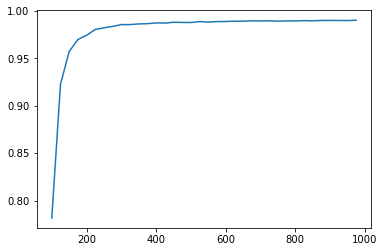

In [135]:
plt.plot(lengths,probs)

In [91]:
predict(add_substitute_error(seq,0.05))

,prob,rank,name
10239,1.0000,superkingdom,Viruses
2497569,0.8602,phylum,Negarnaviricota
2497576,0.8577,class,Ellioviricetes
1980410,0.8577,order,Bunyavirales
1980415,0.5982,family,Nairoviridae
1980517,0.5982,genus,Orthonairovirus
1980526,0.5106,species,Nairobi sheep disease orthonairovirus
1980413,0.1433,family,Hantaviridae
1980442,0.1431,genus,Orthohantavirus
28883,0.1382,order,Caudovirales


In [84]:
predict(seq)

,prob,rank,name
1980410,1.0001,order,Bunyavirales
2497569,1.0001,phylum,Negarnaviricota
2497576,1.0001,class,Ellioviricetes
10239,1.0000,superkingdom,Viruses
1980415,0.9995,family,Nairoviridae
1980517,0.9995,genus,Orthonairovirus
1980526,0.9903,species,Nairobi sheep disease orthonairovirus
1980527,0.0055,species,Qalyub orthonairovirus
